# Buffett Indicator
### The Buffett Indicator is the ratio of total United States stock market valuation to GDP.
### The most common measurement of the aggregate value of the US stock market is the Wilshire 5000.

Source:
[FRED](https://fred.stlouisfed.org/graph/?g=qLC)

In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

In [4]:
# Pull WIlshire 5000 Price data
wilshire_price = fred.get_series('WILL5000PR', observation_start='1970-01-01')
wilshire_price = pd.DataFrame(wilshire_price, columns={'wilshire5K'})
wilshire_price = wilshire_price.dropna()
wilshire_price.tail()

,wilshire5K
2022-04-29,42042.54
2022-05-02,42308.03
2022-05-03,42517.55
2022-05-04,43762.52
2022-05-05,42148.26


In [5]:
# Pull US GDP data and set frequency data to daily and ffill data
gdp_data = fred.get_series('GDP', observation_start='1970-01-01').asfreq('d').ffill()
gdp_data = pd.DataFrame(gdp_data, columns={'GDP'})
gdp_data.tail()

,GDP
2021-12-28,24002.815
2021-12-29,24002.815
2021-12-30,24002.815
2021-12-31,24002.815
2022-01-01,24382.683


In [6]:
# Concat dataframes to calculate Buffett Indicator
combined = pd.concat([wilshire_price, gdp_data],  axis=1).dropna()
combined['buffett_ind'] = combined['wilshire5K'] / combined['GDP']
combined.tail()

,wilshire5K,GDP,buffett_ind
2021-12-27,49115.15,24002.815,2.046225
2021-12-28,49022.20,24002.815,2.042352
2021-12-29,49081.45,24002.815,2.044821
2021-12-30,48969.70,24002.815,2.040165
2021-12-31,48835.47,24002.815,2.034573


In [7]:
# Calculate Buffet Indicator stats
stats = combined['buffett_ind'].describe()
stats

count    10720.000000
mean         0.863675
std          0.355544
min          0.312246
25%          0.579438
50%          0.837861
75%          1.100126
max          2.046225
Name: buffett_ind, dtype: float64

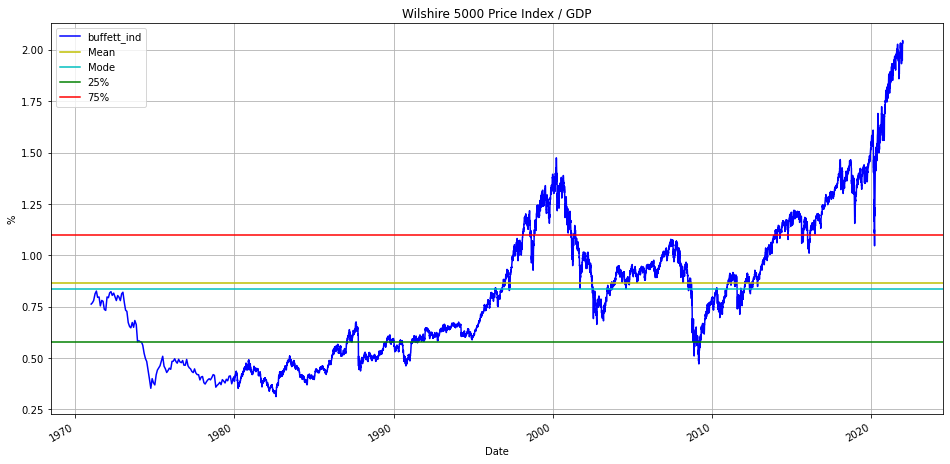

In [8]:
# Plot Buffet Indicator 
combined['buffett_ind'].plot(figsize=(16,8), title='Wilshire 5000 Price Index / GDP', grid=True, xlabel='Date', ylabel= '%', c='b')
plt.axhline(stats['mean'], c='y', label='Mean')
plt.axhline(stats['50%'], label='Mode', c='c')
plt.axhline(stats['25%'], label='25%', c='g')
plt.axhline(stats['75%'], label='75%', c='r')
plt.legend()